In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform
import warnings

# seaborn 사용하기
import seaborn as sns

plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('./Data2/final.csv')
data.head()

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,시군구코드,시군구명,행정동_코드,상권_코드,상권_코드_명,점포매출액,...,행정동_코드_명_신사동,행정동_코드_명_신원동,행정동_코드_명_은천동,행정동_코드_명_인헌동,행정동_코드_명_조원동,행정동_코드_명_중앙동,행정동_코드_명_청룡동,행정동_코드_명_청림동,행정동_코드_명_행운동,행정동_코드_명
0,2014,2,A,골목상권,11620,관악구,11620525,1000804,당곡길,5.713964e+08,...,0,0,0,0,0,0,0,0,0,보라매동
1,2014,2,A,골목상권,11620,관악구,11620525,1000811,봉천로13길,1.337315e+08,...,0,0,0,0,0,0,0,0,0,보라매동
2,2014,2,A,골목상권,11620,관악구,11620545,1000783,관악로30길,2.019276e+08,...,0,0,0,0,0,0,0,1,0,청림동
3,2014,2,A,골목상권,11620,관악구,11620545,1000835,청림3길,1.604613e+08,...,0,0,0,0,0,0,0,1,0,청림동
4,2014,2,A,골목상권,11620,관악구,11620565,1000786,구암길,3.152107e+07,...,0,0,0,0,0,0,0,0,0,성현동


신사동     155
청룡동     155
난곡동     149
미성동     124
대학동     124
서림동     124
남현동     107
신림동     105
행운동      93
낙성대동     93
인헌동      93
조원동      93
삼성동      65
보라매동     62
청림동      62
중앙동      62
성현동      62
신원동      31
난향동      31
은천동      31
서원동      31
Name: 행정동_코드_명, dtype: int64

In [4]:
data.columns

Index(['기준_년_코드', '기준_분기_코드', '상권_구분_코드', '상권_구분_코드_명', '시군구코드', '시군구명',
       '행정동_코드', '상권_코드', '상권_코드_명', '점포매출액', '점포수', '개업_점포_수', '프랜차이즈_점포_수',
       '총_직장_인구_수', '연령대_10_직장_인구_수', '점포수1', '개업_점포_수1', '프랜차이즈_점포_수1',
       '총_직장_인구_수1', '연령대_10_직장_인구_수1', '점포수^21', '점포수 개업_점포_수1',
       '점포수 프랜차이즈_점포_수1', '점포수 총_직장_인구_수1', '점포수 연령대_10_직장_인구_수1',
       '개업_점포_수^21', '개업_점포_수 프랜차이즈_점포_수1', '개업_점포_수 총_직장_인구_수1',
       '개업_점포_수 연령대_10_직장_인구_수1', '프랜차이즈_점포_수^21', '프랜차이즈_점포_수 총_직장_인구_수1',
       '프랜차이즈_점포_수 연령대_10_직장_인구_수1', '총_직장_인구_수^21',
       '총_직장_인구_수 연령대_10_직장_인구_수1', '연령대_10_직장_인구_수^21', '점포수2', '개업_점포_수2',
       '프랜차이즈_점포_수2', '총_직장_인구_수2', '연령대_10_직장_인구_수2', '점포수^22',
       '점포수 개업_점포_수2', '점포수 프랜차이즈_점포_수2', '점포수 총_직장_인구_수2',
       '점포수 연령대_10_직장_인구_수2', '개업_점포_수^22', '개업_점포_수 프랜차이즈_점포_수2',
       '개업_점포_수 총_직장_인구_수2', '개업_점포_수 연령대_10_직장_인구_수2', '프랜차이즈_점포_수^22',
       '프랜차이즈_점포_수 총_직장_인구_수2', '프랜차이즈_점포_수 연령대_10_직장_인구_수2', '총_직장_인구_수^22',
       '총_직장_인구_수 연령대_10_직장_

In [5]:
data['총매출액'] = data['점포매출액'] * data['점포수']

In [8]:
table = data.pivot_table(index=['기준_년_코드', '기준_분기_코드', '상권_구분_코드', '상권_구분_코드_명', '시군구코드', '시군구명',
       '행정동_코드','행정동_코드_명'],values=['총매출액','점포수'],aggfunc=np.sum)

In [9]:
table.reset_index(inplace=True)

In [11]:
table['점포매출액'] = table['총매출액'] / table['점포수']

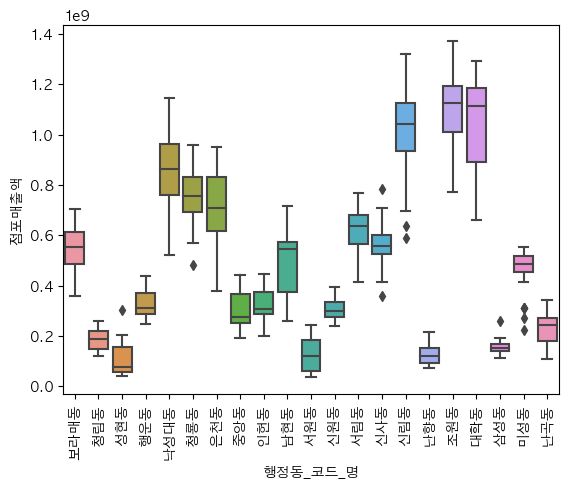

In [14]:
sns.boxplot(
    x='행정동_코드_명',
    y='점포매출액',
    data=table
)

plt.xticks(rotation = 90)

plt.show()

In [15]:
data['행정동_코드_명'].value_counts()

# 대학동으로 선정

신사동     155
청룡동     155
난곡동     149
미성동     124
대학동     124
서림동     124
남현동     107
신림동     105
행운동      93
낙성대동     93
인헌동      93
조원동      93
삼성동      65
보라매동     62
청림동      62
중앙동      62
성현동      62
신원동      31
난향동      31
은천동      31
서원동      31
Name: 행정동_코드_명, dtype: int64

In [16]:
data.columns

Index(['기준_년_코드', '기준_분기_코드', '상권_구분_코드', '상권_구분_코드_명', '시군구코드', '시군구명',
       '행정동_코드', '상권_코드', '상권_코드_명', '점포매출액', '점포수', '개업_점포_수', '프랜차이즈_점포_수',
       '총_직장_인구_수', '연령대_10_직장_인구_수', '점포수1', '개업_점포_수1', '프랜차이즈_점포_수1',
       '총_직장_인구_수1', '연령대_10_직장_인구_수1', '점포수^21', '점포수 개업_점포_수1',
       '점포수 프랜차이즈_점포_수1', '점포수 총_직장_인구_수1', '점포수 연령대_10_직장_인구_수1',
       '개업_점포_수^21', '개업_점포_수 프랜차이즈_점포_수1', '개업_점포_수 총_직장_인구_수1',
       '개업_점포_수 연령대_10_직장_인구_수1', '프랜차이즈_점포_수^21', '프랜차이즈_점포_수 총_직장_인구_수1',
       '프랜차이즈_점포_수 연령대_10_직장_인구_수1', '총_직장_인구_수^21',
       '총_직장_인구_수 연령대_10_직장_인구_수1', '연령대_10_직장_인구_수^21', '점포수2', '개업_점포_수2',
       '프랜차이즈_점포_수2', '총_직장_인구_수2', '연령대_10_직장_인구_수2', '점포수^22',
       '점포수 개업_점포_수2', '점포수 프랜차이즈_점포_수2', '점포수 총_직장_인구_수2',
       '점포수 연령대_10_직장_인구_수2', '개업_점포_수^22', '개업_점포_수 프랜차이즈_점포_수2',
       '개업_점포_수 총_직장_인구_수2', '개업_점포_수 연령대_10_직장_인구_수2', '프랜차이즈_점포_수^22',
       '프랜차이즈_점포_수 총_직장_인구_수2', '프랜차이즈_점포_수 연령대_10_직장_인구_수2', '총_직장_인구_수^22',
       '총_직장_인구_수 연령대_10_직장_

In [21]:
data['연령대_10_직장_인구_수'].mean()

0.5556155507559395